In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-police-shootings-from-20152022/US Police shootings in from 2015-22.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing Data 


In [3]:
df = pd.read_csv("../input/us-police-shootings-from-20152022/US Police shootings in from 2015-22.csv")

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
df.info()
#some information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7682 non-null   int64  
 1   name                     7275 non-null   object 
 2   date                     7682 non-null   object 
 3   manner_of_death          7682 non-null   object 
 4   armed                    7473 non-null   object 
 5   age                      7210 non-null   float64
 6   gender                   7663 non-null   object 
 7   race                     6244 non-null   object 
 8   city                     7682 non-null   object 
 9   state                    7682 non-null   object 
 10  signs_of_mental_illness  7682 non-null   bool   
 11  threat_level             7682 non-null   object 
 12  flee                     6819 non-null   object 
 13  body_camera              7682 non-null   bool   
 14  longitude               

## About Dataset
Below are lists of people killed by law enforcement in the United States, both on duty and off duty. Although Congress instructed the Attorney General in 1994 to compile and publish annual statistics on police use of excessive force, this was never carried out, and the Federal Bureau of Investigation does not collect these data.

Deaths by age group in 2015, according to The Counted

A New York Times study reported how outcomes of active shooter attacks varied with actions of the attacker, the police (42% of total incidents), and bystanders (including a "good guy with a gun" outcome in 5.1% of total incidents). The annual average number of justifiable homicides alone was previously estimated to be near 400. Updated estimates from the Bureau of Justice Statistics released in 2015 estimate the number to be around 930 per year, or 1,240 if assuming that non-reporting local agencies kill people at the same rate as reporting agencies.A 2019 study by Esposito, Lee, and Edwards states that police killings are a leading cause of death for men aged 25–29 at 1.8 per 100000, trailing causes such as accidental death (76.6 per 100000), suicide (26.7 per 100000), and other homicides (22.0 per 100000).

### Understanding our Data

In [6]:
df.describe()
#analysis of data

,id,age,longitude,latitude
count,7682.000000,7210.000000,6847.000000,6847.000000
mean,3841.500000,37.161997,-97.057301,36.668453
std,2217.746717,12.951797,16.593304,5.394855
min,1.000000,2.000000,-160.007000,19.498000
25%,1921.250000,27.000000,-112.040500,33.478500
50%,3841.500000,35.000000,-94.249000,36.095000
75%,5761.750000,45.000000,-83.080500,40.026500
max,7682.000000,92.000000,-67.867000,71.301000


In [7]:
#its time to check for null values, Lets check
null = df.isnull().sum()
null

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

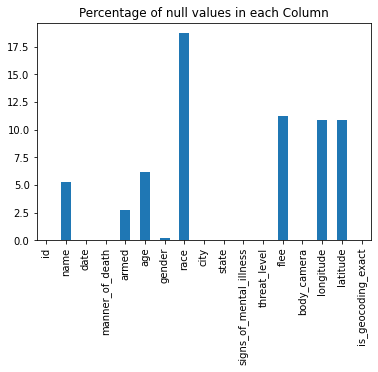

In [8]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent.plot(kind='bar')
plt.title("Percentage of null values in each Column")
plt.show()

In [9]:
df.drop(['id','name'],axis=1,inplace=True)

In [10]:
Dup = df.duplicated().sum()
print("we have", Dup, "Duplicate values.")

we have 2 Duplicate values.


In [11]:
#creating 3 new columns(year, month, day) from Date column 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,3
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4


<function matplotlib.pyplot.show(close=None, block=None)>

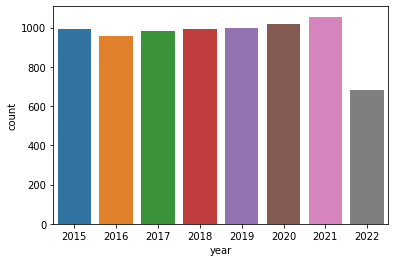

In [12]:
sns.countplot(data = df, x = 'year')
plt.show


In [13]:
#as we can see sudden drop in 2022 shootings, actual reason behind it is incomplete data.
#we dont have complete data of year 2022.
#so we decided to drop data of year 2022, because it can cause bias.
df_mod =df[df.year != 2022]
df_mod

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,3
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2021-12-29,shot,gun,27.0,M,B,Silver Spring,MD,False,attack,Car,False,NaN,NaN,True,2021,12,29
6996,2021-12-29,shot,undetermined,25.0,M,B,Paterson,NJ,False,undetermined,NaN,False,NaN,NaN,True,2021,12,29
6997,2021-12-30,shot,gun,28.0,M,B,Pine Hills,FL,False,other,Not fleeing,False,NaN,NaN,True,2021,12,30
6998,2021-12-31,shot,vehicle,NaN,M,NaN,Beaumont,CA,False,attack,Car,False,NaN,NaN,True,2021,12,31


In [14]:
GB_Y = df_mod.groupby("year")

In [15]:
fig = px.line(GB_Y.count().date, title='Number of Shootings by year',markers=True)
fig.show()

In [16]:
GB_M = df_mod.groupby('month')
fig = px.line(GB_M.count().date, title='Number of Shootings by month',markers=True)
fig.show()

### Observations
from above two graphs (shootings by Year & Month)
* There is continiously increase in shootings from 2016.
* In March, shootings occoured is High compared to other & The least in the month of September.


In [17]:
GB_D = df_mod.groupby('day')
fig = px.line(GB_D.count().date, title='Number of Shootings by day',markers=True)
fig.show()

In [18]:
df_year_month = df_mod.groupby(by=['year','month']).count().date
df_year_month = df_year_month.reset_index().pivot('year','month','date').transpose()

fig = px.line(np.cumsum(df_year_month), title='Number of Shootings Cumulative',markers=True)
fig.show()

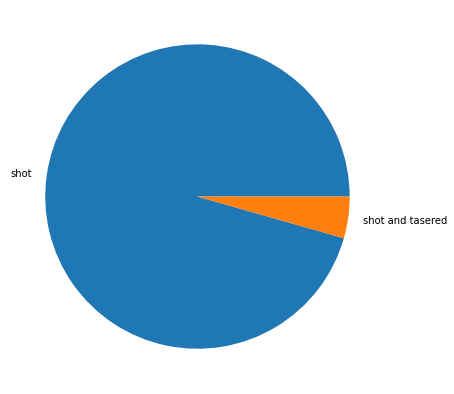

shot                7343
shot and Tasered     339
Name: manner_of_death, dtype: int64


In [19]:
#manner of death
plt.figure(figsize=(7,7))
plt.pie(df.manner_of_death.value_counts(), labels=['shot', 'shot and tasered'])
plt.show()

print(df.manner_of_death.value_counts())

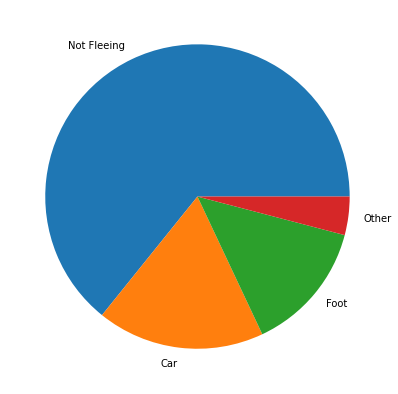

Not fleeing    4125
Car            1143
Foot            894
Other           262
Name: flee, dtype: int64

In [20]:
plt.figure(figsize=(7,7))
plt.pie(df_mod.flee.value_counts(), labels=['Not Fleeing', 'Car', 'Foot', 'Other'])
plt.show()

df_mod.flee.value_counts()

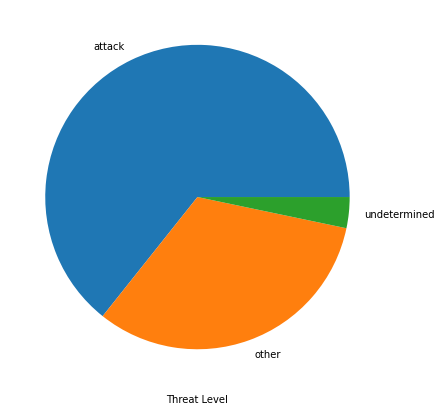

attack          4501
other           2269
undetermined     230
Name: threat_level, dtype: int64

In [21]:
plt.figure(figsize=(7,7))
plt.pie(df_mod.threat_level.value_counts(), labels=['attack', 'other', 'undetermined'])
plt.xlabel('Threat Level')
plt.show()
df_mod.threat_level.value_counts()

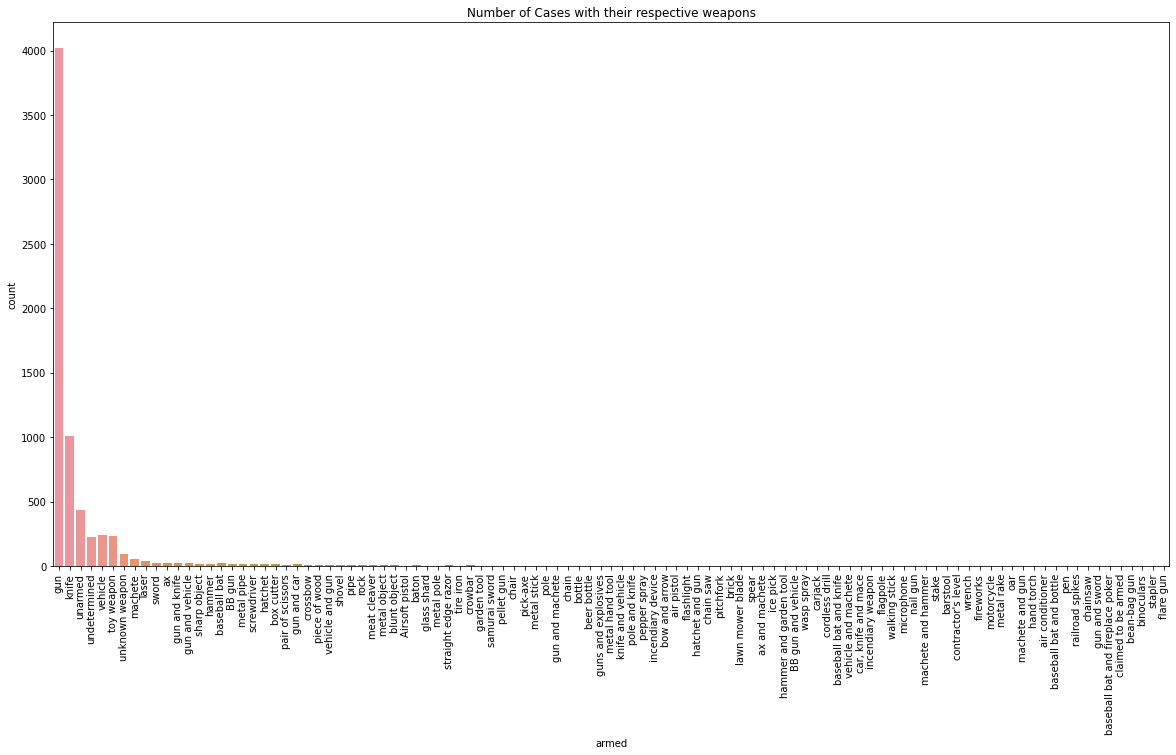

gun                 4017
knife               1008
unarmed              434
vehicle              244
toy weapon           235
undetermined         224
unknown weapon        95
machete               55
Taser                 36
sword                 26
ax                    24
gun and knife         24
gun and vehicle       21
baseball bat          20
hammer                19
sharp object          17
BB gun                17
screwdriver           17
metal pipe            16
hatchet               14
gun and car           13
box cutter            13
pair of scissors      10
vehicle and gun        9
crossbow               9
piece of wood          9
Name: armed, dtype: int64

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_mod,x='armed',order=df['armed'].value_counts().index)
plt.title("Number of Cases with their respective weapons")
plt.xticks(rotation=90)
plt.show()
armed = df_mod.armed.value_counts()
armed.head(26)

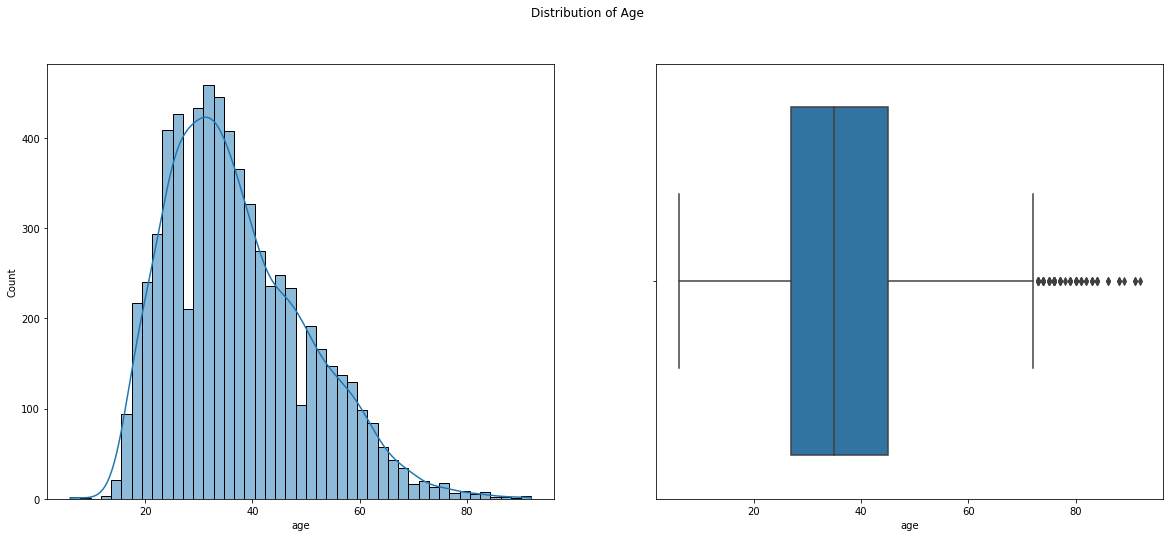

In [23]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=df_mod,x='age',kde=True,ax=ax[0])

sns.boxplot(x=df_mod['age'],ax=ax[1])
plt.suptitle("Distribution of Age")
plt.show()

#### Observation
Most of the people's age lie between 20-45 as most of the people were young.

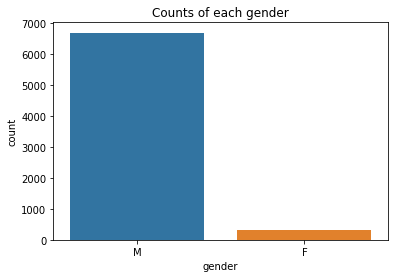

M    6680
F     316
Name: gender, dtype: int64

In [24]:
#Gender
sns.countplot(data=df_mod,x='gender')
plt.title("Counts of each gender")
plt.show()
df_mod.gender.value_counts()

### observation
We see that the incidents mainly happenend to Male category. High Imbalance here.

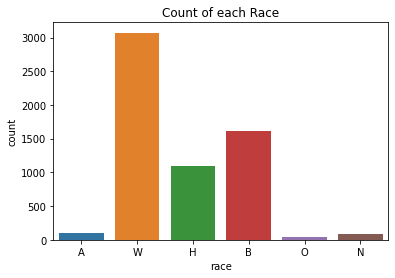

W    3071
B    1615
H    1100
A     106
N      92
O      47
Name: race, dtype: int64

In [25]:
#Race
sns.countplot(data=df_mod,x='race')
plt.title("Count of each Race")
plt.show()
df_mod.race.value_counts()


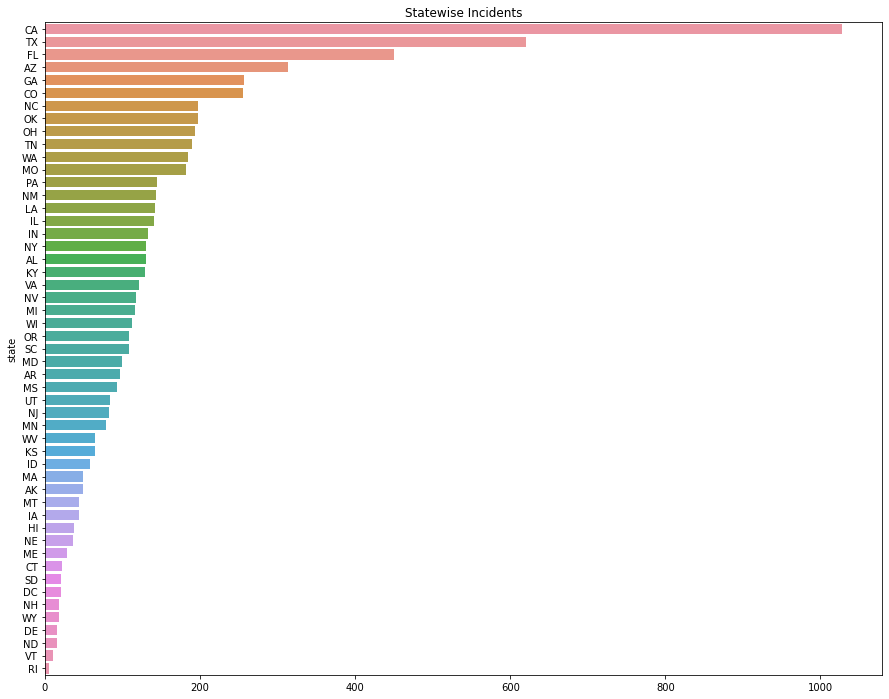

Most of the incidents were shown in the state of California.


In [26]:
#state
state = df_mod.state.value_counts().reset_index()
state.columns = ['state', 'count']

plt.figure(figsize=(15,12))
sns.barplot(data=state, x='count', y='state')
plt.title('Statewise Incidents')
plt.xlabel(None)
plt.show()
print("Most of the incidents were shown in the state of California.")

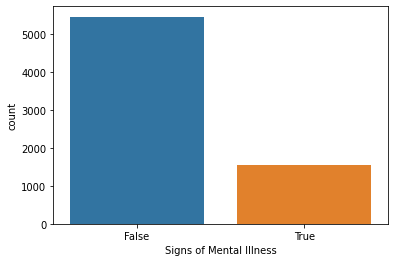

False    6058
True     1624
Name: signs_of_mental_illness, dtype: int64

In [27]:
#Mental Illness
sns.countplot(data=df_mod, x='signs_of_mental_illness')
plt.xlabel('Signs of Mental Illness')
plt.show()

df.signs_of_mental_illness.value_counts()

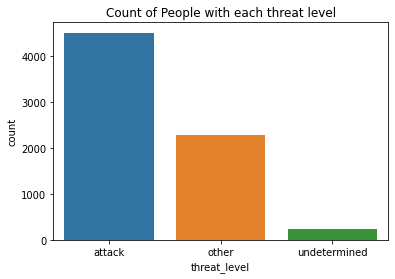

attack          4501
other           2269
undetermined     230
Name: threat_level, dtype: int64

In [28]:
#Threat Level
sns.countplot(data=df_mod,x='threat_level')
plt.title("Count of People with each threat level")
plt.show()
df_mod.threat_level.value_counts()

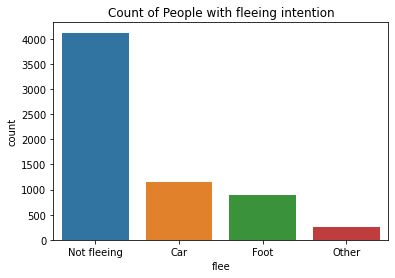

Not fleeing    4125
Car            1143
Foot            894
Other           262
Name: flee, dtype: int64

In [29]:
#Flee
sns.countplot(data=df_mod,x='flee')
plt.title("Count of People with fleeing intention")
plt.show()
df_mod.flee.value_counts()

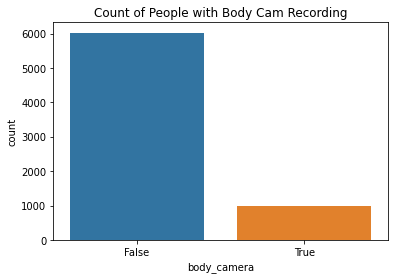

False    6022
True      978
Name: body_camera, dtype: int64

In [30]:
#Body Camera
sns.countplot(data=df_mod,x='body_camera')
plt.title("Count of People with Body Cam Recording")
plt.show()
df_mod.body_camera.value_counts()

In [31]:
#Year & State
df_year_state = df_mod.groupby(by=['year','state']).count().date
df_year_state = df_year_state.reset_index()
df_year_state.columns = ['year','state','count']
fig = px.choropleth(df_year_state,
                    locations='state', 
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame='year',
                    title="Incidents Observed in Each State Over the Year") 
fig.show()

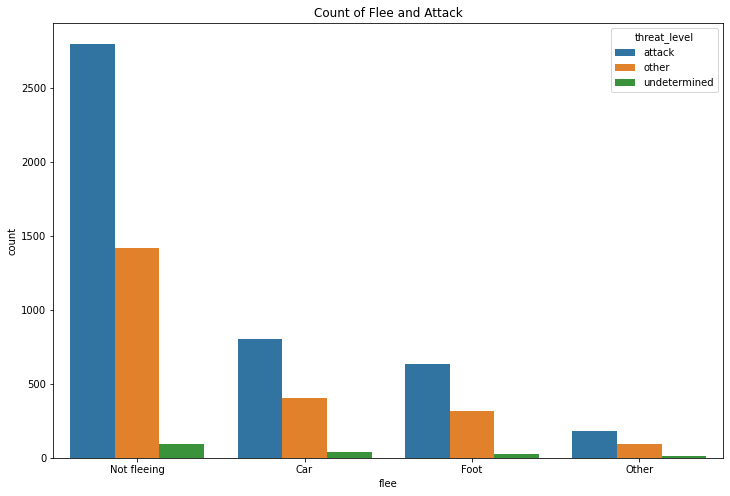

Not fleeing    4125
Car            1143
Foot            894
Other           262
Name: flee, dtype: int64

In [32]:
#Flee & Attack
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='flee',hue='threat_level')
plt.title("Count of Flee and Attack")
plt.show()
df_mod.flee.value_counts()

#### Observation
Most of the people tried to attack irrespective of their fleeing intention.

## Overall Observetions
In this data we got to know about various things about US-Police Shootings. following are the findings from this data.
* Shootings in US continiously increasing year by year from 2016.
* Deaths by officers are primarily shot dead instead of tasered and shot.
* Officers have killed more individuals between the ages of 21-40 than any other age.
* Officers almost always have their body cameras off.
* Officers typcially kill males vs females.
* Los Angeles is the city with the highest deaths by officers in the USA for years 2015-2022.
* Officers kill more victims when the victim has a gun and a knife. However, even unarmed, 377 deaths still occured.
* Main two races killed by officers are whites and blacks.
* By not fleeing, a victim is more prone to a shooting vs fleeing in a car, foot, or by other methods.

It is beyond dispute that there is an issue with deaths brought on by police shootings in the USA. In the US, police officers kill innocent people frequently. Everyone is entitled to life. No one should deprive it of its solitude. Conditions may change in cases involving militants, terrorists, or other dangerous offenders. Exceptions are possible.




## Suggestions
Urge police to always have their body cameras on. Police officer will be fined if turned off. Having an officer's body camera on at all times would not be a problem if they are conducting themselves as the legal system requires. By doing this, the nation's death rate will drastically decline and the prevalence of police shootings will disappear.